In [1]:
from theano.sandbox import cuda
cuda.use('gpu')

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Quadro K2200 (CNMeM is disabled, cuDNN 5103)
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29



In [4]:
import os 
os.chdir("/home/rdelaviz/Learning/DL/FastAI/courses/deeplearning1/nbs")


In [6]:
%matplotlib inline 
import utils; reload(utils)
from utils import *
from __future__ import division, print_function

In [7]:
batch_size= 64


In [9]:
from keras.datasets import mnist
(X_train,y_train),(X_test, y_test) = mnist.load_data()
(X_train.shape,y_train.shape, X_test.shape, y_test.shape)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
y_train = onehot(y_train)
y_test = onehot(y_test)

In [12]:
y_train[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [16]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

In [18]:
d = np.asarray([[1,2],[3,4]])

In [40]:
d.shape
d.mean()
b = np.expand_dims(d,5)
print(d.shape)
print(b.shape)

(2, 2)
(2, 2, 1)


In [21]:
def norm_input(x): return (x-mean_px)/std_px

In [80]:
def get_line_model():
    model = Sequential(
        [Lambda(norm_input, input_shape=(1,28,28),output_shape=(1,28,28)),
        Flatten(),
        Dense(10, activation="softmax")])
    model.compile(Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
    return(model)


In [81]:
lm = get_line_model()

Expands the X arrays dimention to 4 dimention otherwise the flow will complain.


In [33]:
X_train = np.expand_dims(X_train, 1)
X_test = np.expand_dims(X_test, 1)


In [34]:
X_train.shape

(60000, 1, 28, 28)

In [82]:
gen = image.ImageDataGenerator()
batches = gen.flow(X_train, y_train, batch_size=64)
test_batches = gen.flow(X_test, y_test, batch_size=64)


In [77]:
type(batches)
img = next(batches)
print(type(img))
print(img[0].shape)
print(img[1].shape)



<type 'tuple'>
(64, 1, 28, 28)
(64, 10)



#### img is a batch of images and associated labels, below we plot some of the images 

(28, 28)


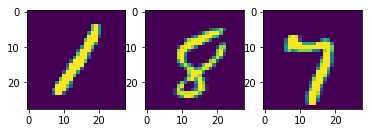

In [71]:
fig = plt.figure()
print(img[0][1][0].shape)
fig.add_subplot(1,3,1)
imgplot = plt.imshow(img[0][0][0])
fig.add_subplot(1,3,2)
imgplot = plt.imshow(img[0][1][0])
fig.add_subplot(1,3,3)
imgplot = plt.imshow(img[0][50][0])



In [88]:
print(lm.summary())
type(batches)
batches.



SyntaxError: invalid syntax (<ipython-input-88-ef6ebc555f2e>, line 3)

In [90]:
lm.fit_generator(batches, batches.n, nb_epoch=1, 
                    validation_data=test_batches, nb_val_samples=test_batches.n)

Epoch 1/1
60000/60000 [==============================] - 15s - loss: 0.4261 - acc: 0.8745 - val_loss: 0.3015 - val_acc: 0.9127


In [94]:
lm.optimizer.lr=0.1

In [95]:
lm.fit_generator(batches, batches.n, nb_epoch=1, 
                    validation_data=test_batches, nb_val_samples=test_batches.n)

Epoch 1/1
60000/60000 [==============================] - 18s - loss: 0.2994 - acc: 0.9143 - val_loss: 0.2813 - val_acc: 0.9219


In [96]:
lm.optimizer.lr=0.01
lm.fit_generator(batches, batches.n, nb_epoch=4, 
                    validation_data=test_batches, nb_val_samples=test_batches.n)

Epoch 1/4
60000/60000 [==============================] - 14s - loss: 0.2852 - acc: 0.9195 - val_loss: 0.2805 - val_acc: 0.9224
Epoch 2/4
60000/60000 [==============================] - 13s - loss: 0.2778 - acc: 0.9229 - val_loss: 0.2771 - val_acc: 0.9215
Epoch 3/4
60000/60000 [==============================] - 13s - loss: 0.2753 - acc: 0.9227 - val_loss: 0.2776 - val_acc: 0.9229
Epoch 4/4
60000/60000 [==============================] - 13s - loss: 0.2688 - acc: 0.9257 - val_loss: 0.2699 - val_acc: 0.9251


### Single Dense Layer 

In [97]:
def get_fc_model():
    model = Sequential([
        Lambda(norm_input, input_shape=(1,28,28)),
        Flatten(),
        Dense(512, activation='softmax'),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [103]:
fc = get_fc_model()


/home/rdelaviz/anaconda2/lib/python2.7/site-packages/keras/layers/core.py:622: UserWarning: `output_shape` argument not specified for layer lambda_5 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 1, 28, 28)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [104]:
fc.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_5 (Lambda)                (None, 1, 28, 28)     0           lambda_input_5[0][0]             
____________________________________________________________________________________________________
flatten_5 (Flatten)              (None, 784)           0           lambda_5[0][0]                   
____________________________________________________________________________________________________
dense_6 (Dense)                  (None, 512)           401920      flatten_5[0][0]                  
____________________________________________________________________________________________________
dense_7 (Dense)                  (None, 10)            5130        dense_6[0][0]                    
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
___________________

In [101]:
fc.fit_generator(batches, batches.n, nb_epoch=1, 
                    validation_data=test_batches, nb_val_samples=test_batches.n)

Epoch 1/1
60000/60000 [==============================] - 15s - loss: 0.8178 - acc: 0.8552 - val_loss: 0.6474 - val_acc: 0.8511


In [105]:
fc.optimizer.lr=0.1
fc.fit_generator(batches, batches.n, nb_epoch=4, 
                    validation_data=test_batches, nb_val_samples=test_batches.n)

Epoch 1/4
60000/60000 [==============================] - 14s - loss: 1.1072 - acc: 0.6282 - val_loss: 0.9888 - val_acc: 0.6582
Epoch 2/4
60000/60000 [==============================] - 15s - loss: 0.9788 - acc: 0.6665 - val_loss: 0.9511 - val_acc: 0.6773
Epoch 3/4
60000/60000 [==============================] - 13s - loss: 0.9317 - acc: 0.6763 - val_loss: 0.9369 - val_acc: 0.6549
Epoch 4/4
60000/60000 [==============================] - 15s - loss: 0.9225 - acc: 0.6696 - val_loss: 0.8964 - val_acc: 0.6697


In [106]:
fc.optimizer.lr=0.01
fc.fit_generator(batches, batches.n, nb_epoch=4, 
                    validation_data=test_batches, nb_val_samples=test_batches.n)

Epoch 1/4
60000/60000 [==============================] - 14s - loss: 0.8386 - acc: 0.7019 - val_loss: 0.8103 - val_acc: 0.7168
Epoch 2/4
60000/60000 [==============================] - 15s - loss: 0.8289 - acc: 0.7115 - val_loss: 0.7638 - val_acc: 0.7333
Epoch 3/4
60000/60000 [==============================] - 15s - loss: 0.8527 - acc: 0.7046 - val_loss: 0.7772 - val_acc: 0.7223
Epoch 4/4
60000/60000 [==============================] - 15s - loss: 0.8623 - acc: 0.6978 - val_loss: 0.9785 - val_acc: 0.6576


In [107]:
fc.optimizer.lr=0.005
fc.fit_generator(batches, batches.n, nb_epoch=4, 
                    validation_data=test_batches, nb_val_samples=test_batches.n)

Epoch 1/4
60000/60000 [==============================] - 15s - loss: 0.8278 - acc: 0.7059 - val_loss: 0.7575 - val_acc: 0.7150
Epoch 2/4
60000/60000 [==============================] - 15s - loss: 0.8593 - acc: 0.6997 - val_loss: 0.7869 - val_acc: 0.7236
Epoch 3/4
60000/60000 [==============================] - 16s - loss: 0.8402 - acc: 0.7013 - val_loss: 0.8145 - val_acc: 0.7204
Epoch 4/4
60000/60000 [==============================] - 15s - loss: 0.7995 - acc: 0.7143 - val_loss: 0.7500 - val_acc: 0.7287


### Basic 'VGG-style' CNN

In [113]:
def get_model():
    model = Sequential([
        Lambda(norm_input, input_shape=(1,28,28)),
        Convolution2D(32,3,3, activation='relu'),
        Convolution2D(32,3,3, activation='relu'),
        MaxPooling2D(),
        Convolution2D(64,3,3, activation='relu'),
        Convolution2D(64,3,3, activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [114]:
m = get_model()
m.summary()

/home/rdelaviz/anaconda2/lib/python2.7/site-packages/keras/layers/core.py:622: UserWarning: `output_shape` argument not specified for layer lambda_8 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 1, 28, 28)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_8 (Lambda)                (None, 1, 28, 28)     0           lambda_input_8[0][0]             
____________________________________________________________________________________________________
convolution2d_5 (Convolution2D)  (None, 32, 26, 26)    320         lambda_8[0][0]                   
____________________________________________________________________________________________________
convolution2d_6 (Convolution2D)  (None, 32, 24, 24)    9248        convolution2d_5[0][0]            
____________________________________________________________________________________________________
maxpooling2d_2 (MaxPooling2D)    (None, 32, 12, 12)    0           convolution2d_6[0][0]            
___________________________________________________________________________________________

In [115]:
model = get_model()


/home/rdelaviz/anaconda2/lib/python2.7/site-packages/keras/layers/core.py:622: UserWarning: `output_shape` argument not specified for layer lambda_9 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 1, 28, 28)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [116]:
model.fit_generator(batches, batches.n, nb_epoch=1, 
                    validation_data=test_batches, nb_val_samples=test_batches.n)

Epoch 1/1
60000/60000 [==============================] - 27s - loss: 0.1132 - acc: 0.9649 - val_loss: 0.0387 - val_acc: 0.9874


In [117]:
model.optimizer.lr = 0.1
model.fit_generator(batches, batches.n, nb_epoch=1, 
                    validation_data=test_batches, nb_val_samples=test_batches.n)

Epoch 1/1
60000/60000 [==============================] - 26s - loss: 0.0339 - acc: 0.9894 - val_loss: 0.0299 - val_acc: 0.9916


In [118]:
model.optimizer.lr = 0.01
model.fit_generator(batches, batches.n, nb_epoch=4, 
                    validation_data=test_batches, nb_val_samples=test_batches.n)

Epoch 1/4
60000/60000 [==============================] - 29s - loss: 0.0251 - acc: 0.9917 - val_loss: 0.0260 - val_acc: 0.9910
Epoch 2/4
60000/60000 [==============================] - 28s - loss: 0.0190 - acc: 0.9938 - val_loss: 0.0251 - val_acc: 0.9918
Epoch 3/4
60000/60000 [==============================] - 26s - loss: 0.0151 - acc: 0.9950 - val_loss: 0.0326 - val_acc: 0.9916.99
Epoch 4/4
60000/60000 [==============================] - 28s - loss: 0.0130 - acc: 0.9960 - val_loss: 0.0286 - val_acc: 0.9924


In [119]:
model.optimizer.lr = 0.005
model.fit_generator(batches, batches.n, nb_epoch=2, 
                    validation_data=test_batches, nb_val_samples=test_batches.n)

Epoch 1/2
60000/60000 [==============================] - 29s - loss: 0.0114 - acc: 0.9963 - val_loss: 0.0252 - val_acc: 0.9934
Epoch 2/2
60000/60000 [==============================] - 27s - loss: 0.0096 - acc: 0.9966 - val_loss: 0.0276 - val_acc: 0.9921


### Data Augmentation

In [120]:
model = get_model()

/home/rdelaviz/anaconda2/lib/python2.7/site-packages/keras/layers/core.py:622: UserWarning: `output_shape` argument not specified for layer lambda_10 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 1, 28, 28)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [121]:
gen = image.ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=64)
test_batches = gen.flow(X_test, y_test, batch_size=64)

In [122]:
batches.n

60000

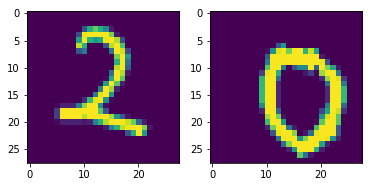

In [124]:
img2 = next(batches)
fig = plt.figure()
fig.add_subplot(1,2,1)
imgplot = plt.imshow(img[0][0][0])
fig.add_subplot(1,2,2)
imgplot = plt.imshow(img2[0][0][0])


In [126]:
model.fit_generator(batches, batches.n, nb_epoch=1, 
                    validation_data=test_batches, nb_val_samples=test_batches.n)

Epoch 1/1
60000/60000 [==============================] - 29s - loss: 0.2076 - acc: 0.9351 - val_loss: 0.0603 - val_acc: 0.9805


In [127]:
model.optimizer.lr = 0.1
model.fit_generator(batches, batches.n, nb_epoch=4, 
                    validation_data=test_batches, nb_val_samples=test_batches.n)

Epoch 1/4
60000/60000 [==============================] - 29s - loss: 0.0709 - acc: 0.9781 - val_loss: 0.0494 - val_acc: 0.9855
Epoch 2/4
60000/60000 [==============================] - 26s - loss: 0.0564 - acc: 0.9824 - val_loss: 0.0476 - val_acc: 0.9845
Epoch 3/4
60000/60000 [==============================] - 27s - loss: 0.0458 - acc: 0.9851 - val_loss: 0.0502 - val_acc: 0.9853
Epoch 4/4
60000/60000 [==============================] - 27s - loss: 0.0446 - acc: 0.9864 - val_loss: 0.0417 - val_acc: 0.9880


In [128]:
model.optimizer.lr = 0.001
model.fit_generator(batches, batches.n, nb_epoch=4, 
                    validation_data=test_batches, nb_val_samples=test_batches.n)

Epoch 1/4
60000/60000 [==============================] - 28s - loss: 0.0393 - acc: 0.9876 - val_loss: 0.0313 - val_acc: 0.9901
Epoch 2/4
60000/60000 [==============================] - 27s - loss: 0.0366 - acc: 0.9883 - val_loss: 0.0311 - val_acc: 0.9906
Epoch 3/4
60000/60000 [==============================] - 27s - loss: 0.0338 - acc: 0.9899 - val_loss: 0.0364 - val_acc: 0.9896
Epoch 4/4
60000/60000 [==============================] - 29s - loss: 0.0339 - acc: 0.9893 - val_loss: 0.0391 - val_acc: 0.9884


### Batchnorm + dropout + data augmentation

In [129]:
def get_model_bn_do():
    model = Sequential([
        Lambda(norm_input, input_shape=(1,28,28)),
        Convolution2D(32,3,3, activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,3,3, activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64,3,3, activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,3,3, activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [130]:
model = get_model_bn_do()


/home/rdelaviz/anaconda2/lib/python2.7/site-packages/keras/layers/core.py:622: UserWarning: `output_shape` argument not specified for layer lambda_11 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 1, 28, 28)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [140]:
model.optimizer.lr = 0.001
model.fit_generator(batches, batches.n, nb_epoch=10, 
                    validation_data=test_batches, nb_val_samples=test_batches.n)

Epoch 1/10
60000/60000 [==============================] - 43s - loss: 0.0932 - acc: 0.9721 - val_loss: 0.0455 - val_acc: 0.9860
Epoch 2/10
60000/60000 [==============================] - 43s - loss: 0.0754 - acc: 0.9763 - val_loss: 0.0474 - val_acc: 0.9858
Epoch 3/10
60000/60000 [==============================] - 42s - loss: 0.0642 - acc: 0.9801 - val_loss: 0.0374 - val_acc: 0.9881
Epoch 4/10
60000/60000 [==============================] - 44s - loss: 0.0618 - acc: 0.9812 - val_loss: 0.0389 - val_acc: 0.9866
Epoch 5/10
60000/60000 [==============================] - 44s - loss: 0.0542 - acc: 0.9829 - val_loss: 0.0331 - val_acc: 0.9892
Epoch 6/10
60000/60000 [==============================] - 42s - loss: 0.0537 - acc: 0.9835 - val_loss: 0.0313 - val_acc: 0.9897
Epoch 7/10
60000/60000 [==============================] - 44s - loss: 0.0510 - acc: 0.9846 - val_loss: 0.0344 - val_acc: 0.9879
Epoch 8/10
60000/60000 [==============================] - 45s - loss: 0.0441 - acc: 0.9864 - val_loss: 0

In [136]:
model.evaluate(X_test, y_test, batch_size=256, verbose=1)

 9728/10000 [============================>.] - ETA: 0s

[0.026541001514717937, 0.99209999999999998]

In [134]:
??model.evaluate


In [137]:
model.metrics_names

['loss', 'acc']

In [138]:
model.predict(X_test, batch_size=512)

array([[  2.4306e-05,   6.2559e-06,   1.6067e-04, ...,   9.9979e-01,   4.0608e-07,   1.1341e-05],
       [  3.9882e-06,   4.5923e-06,   9.9999e-01, ...,   7.9640e-09,   1.1923e-08,   1.8024e-09],
       [  2.4394e-06,   9.9988e-01,   1.3141e-06, ...,   2.5120e-06,   4.3119e-07,   7.3521e-08],
       ..., 
       [  6.1878e-10,   1.7517e-08,   1.8519e-09, ...,   1.7476e-07,   4.4447e-06,   1.0691e-06],
       [  4.9393e-06,   1.8291e-07,   8.4869e-08, ...,   7.7145e-07,   1.8569e-03,   3.2579e-05],
       [  2.6533e-06,   1.5906e-08,   3.3004e-07, ...,   2.6319e-08,   4.1703e-05,   5.3153e-08]], dtype=float32)

In [139]:
model.evaluate(X_train, y_train, batch_size=256, verbose=1)

60000/60000 [==============================] - 5s     


[0.032130928658445676, 0.99039999996821082]

### Ensemble of methods 

In [147]:
def fit_model():
    model = get_model_bn_do()
    model.fit_generator(batches, batches.n, nb_epoch=1, verbose=0,
                        validation_data=test_batches, nb_val_samples=test_batches.n)
    model.optimizer.lr=0.1
    model.fit_generator(batches, batches.n, nb_epoch=4, verbose=0,
                        validation_data=test_batches, nb_val_samples=test_batches.n)
    model.optimizer.lr=0.01
    model.fit_generator(batches, batches.n, nb_epoch=12, verbose=0,
                        validation_data=test_batches, nb_val_samples=test_batches.n)
    model.optimizer.lr=0.001
    model.fit_generator(batches, batches.n, nb_epoch=18, verbose=0,
                        validation_data=test_batches, nb_val_samples=test_batches.n)
    return model


In [148]:
models = [fit_model() for i in range(0,6)]

/home/rdelaviz/anaconda2/lib/python2.7/site-packages/keras/layers/core.py:622: UserWarning: `output_shape` argument not specified for layer lambda_13 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 1, 28, 28)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))
/home/rdelaviz/anaconda2/lib/python2.7/site-packages/keras/layers/core.py:622: UserWarning: `output_shape` argument not specified for layer lambda_14 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 1, 28, 28)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))
/home/rdelaviz/anaconda2/lib/python2.7/site-packages/keras/layers/core.py:622: UserWarning: `output_shape` argument not specified for layer lambda_15 and cannot be automatically inferred with 

In [151]:
model_path = os.getcwd()+"/RahimModels/mnist/"


In [152]:
for i,m in enumerate(models):
    m.save_weights(model_path+'cnn-mnist23-'+str(i)+'.pkl')

In [153]:
evals = np.array([m.evaluate(X_test, y_test, batch_size=256) for m in models])

 9984/10000 [============================>.] - ETA: 0s

In [154]:
evals.mean(axis=0)

array([ 0.013 ,  0.9958])

In [155]:
all_preds = np.stack([m.predict(X_test, batch_size=256) for m in models])

In [156]:
avg_preds = all_preds.mean(axis=0)

In [158]:
keras.metrics.categorical_accuracy(y_test, avg_preds).eval()

array(0.9969000220298767, dtype=float32)